In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }<style>"))

# Analysis

In [2]:
from utilities import *
from models import *

In [3]:
import joblib

In [4]:
ble = read_ble("../Data/ble.csv")

In [5]:
pin_file = "../Data/pin.csv"

pin = read_pin(pin_file)

In [6]:
testPin_file = "../Data/testPin.csv"

testPin = read_pin(testPin_file)

In [7]:
filename = "../Data/rssi5.csv"
B1 = "0117C55D14E4"

data = read_data(filename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [8]:
data[scanners] = min_max_scaling(data[scanners])

In [9]:
testFilename = "../Data/testRssi.csv"
B1 = "0117C55D14E4"

test = read_data(testFilename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [10]:
test[scanners] = min_max_scaling(test[scanners])

## Train Validation Split

In [11]:
train, validation = train_validation_split(data)

In [12]:
train.groupby("location")[scanners].count()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
location,,,,,,,,,,,,,,,,,
V1_10,281,151,102,258,232,95,98,339,0,213,123,161,257,382,193,4,284
V1_11,62,84,102,125,149,104,83,122,153,62,72,174,161,43,52,27,107
V1_12,91,100,71,123,104,105,72,72,207,63,91,199,156,107,139,75,89
V1_13,88,176,65,146,57,115,136,146,324,18,53,144,117,128,190,20,80
V1_14,43,200,63,107,77,117,342,84,266,19,137,63,104,127,224,91,116
V1_18,81,30,61,113,59,45,35,292,3,93,49,75,71,298,36,0,209
V1_19,381,123,114,195,316,107,75,403,51,178,62,185,332,390,142,117,281
V1_20,139,140,124,102,152,112,85,104,108,46,84,116,223,19,110,28,93
V1_21,88,183,100,98,126,118,162,68,187,28,120,122,110,80,119,89,82


In [13]:
train.shape

(39730, 19)

In [14]:
validation.shape

(9933, 19)

In [15]:
train.sort_values("time", inplace=True)
validation.sort_values("time", inplace=True)
test.sort_values("time", inplace=True)

In [16]:
train_rolled = train.groupby("location").rolling(30, min_periods=1).mean().reset_index()
validation_rolled = validation.groupby("location").rolling(30, min_periods=1).mean().reset_index()
test_rolled = test.groupby("location").rolling(30, min_periods=1).mean().reset_index()

In [17]:
train_rolled

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,30171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_10,30172,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_10,30173,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_10,30176,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,0.583333,NaN,NaN,NaN,0.450000
4,V1_10,30177,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,0.575000,NaN,NaN,NaN,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39725,V1_9,43166,0.433333,NaN,0.366667,0.606667,0.483333,NaN,NaN,0.622222,NaN,0.183333,0.183333,0.558333,0.400000,0.475,0.4,0.133333,0.416667
39726,V1_9,43167,0.433333,NaN,0.366667,0.606667,0.483333,NaN,NaN,0.622222,NaN,0.183333,0.183333,0.558333,0.400000,0.475,0.4,0.125000,0.416667
39727,V1_9,43168,0.433333,NaN,0.366667,0.606667,0.483333,NaN,NaN,0.622222,NaN,0.183333,0.183333,0.558333,0.422222,0.475,0.4,0.125000,0.416667
39728,V1_9,43169,0.433333,NaN,0.366667,0.606667,0.483333,NaN,NaN,0.620833,NaN,0.183333,0.183333,0.558333,0.422222,0.475,0.4,0.125000,0.416667


## Imputation
1. Forward fill
2. Fill NaN

In [18]:
train_imputed = train_rolled.set_index("location").groupby("location").ffill()
train_imputed.reset_index(inplace=True)

In [19]:
train_imputed

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,30171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_10,30172,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_10,30173,0.533333,NaN,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_10,30176,0.533333,NaN,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,NaN,0.183333,NaN,0.583333,NaN,NaN,NaN,0.450000
4,V1_10,30177,0.533333,NaN,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,NaN,0.183333,NaN,0.575000,NaN,NaN,NaN,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39725,V1_9,43166,0.433333,0.283333,0.366667,0.606667,0.483333,0.216667,0.233333,0.622222,0.216667,0.183333,0.183333,0.558333,0.400000,0.475,0.4,0.133333,0.416667
39726,V1_9,43167,0.433333,0.283333,0.366667,0.606667,0.483333,0.216667,0.233333,0.622222,0.216667,0.183333,0.183333,0.558333,0.400000,0.475,0.4,0.125000,0.416667
39727,V1_9,43168,0.433333,0.283333,0.366667,0.606667,0.483333,0.216667,0.233333,0.622222,0.216667,0.183333,0.183333,0.558333,0.422222,0.475,0.4,0.125000,0.416667
39728,V1_9,43169,0.433333,0.283333,0.366667,0.606667,0.483333,0.216667,0.233333,0.620833,0.216667,0.183333,0.183333,0.558333,0.422222,0.475,0.4,0.125000,0.416667


In [20]:
validation_imputed = validation_rolled.set_index("location").groupby("location").ffill()
validation_imputed.reset_index(inplace=True)

In [21]:
test_imputed = test_rolled.set_index("location").groupby("location").ffill()
test_imputed.reset_index(inplace=True)

In [22]:
train_imputed

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,30171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_10,30172,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_10,30173,0.533333,NaN,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_10,30176,0.533333,NaN,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,NaN,0.183333,NaN,0.583333,NaN,NaN,NaN,0.450000
4,V1_10,30177,0.533333,NaN,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,NaN,0.183333,NaN,0.575000,NaN,NaN,NaN,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39725,V1_9,43166,0.433333,0.283333,0.366667,0.606667,0.483333,0.216667,0.233333,0.622222,0.216667,0.183333,0.183333,0.558333,0.400000,0.475,0.4,0.133333,0.416667
39726,V1_9,43167,0.433333,0.283333,0.366667,0.606667,0.483333,0.216667,0.233333,0.622222,0.216667,0.183333,0.183333,0.558333,0.400000,0.475,0.4,0.125000,0.416667
39727,V1_9,43168,0.433333,0.283333,0.366667,0.606667,0.483333,0.216667,0.233333,0.622222,0.216667,0.183333,0.183333,0.558333,0.422222,0.475,0.4,0.125000,0.416667
39728,V1_9,43169,0.433333,0.283333,0.366667,0.606667,0.483333,0.216667,0.233333,0.620833,0.216667,0.183333,0.183333,0.558333,0.422222,0.475,0.4,0.125000,0.416667


## Change Location to Coordinates

In [23]:
train_imputed["X"] = train_imputed["location"].apply(lambda x: pin[x]["X"])
train_imputed["Y"] = train_imputed["location"].apply(lambda x: pin[x]["Y"])

In [24]:
validation_imputed["X"] = validation_imputed["location"].apply(lambda x: pin[x]["X"])
validation_imputed["Y"] = validation_imputed["location"].apply(lambda x: pin[x]["Y"])

In [25]:
test_imputed["X"] = test_imputed["location"].apply(lambda x: testPin[x]["X"])
test_imputed["Y"] = test_imputed["location"].apply(lambda x: testPin[x]["Y"])

In [26]:
def reg_impute(data):
    for s in scanners:
        dx = data['X'] - ble[s]['X']
        dy = data['Y'] - ble[s]['Y']
        d = np.sqrt(np.square(dy) + np.square(dx))
        reg = joblib.load('../Models/linear_distance_models/{}.joblib'.format(s))
        ss = pd.Series(reg.predict(d.values.reshape((-1, 1))))
        data[s].fillna(ss, inplace=True)

In [27]:
reg_impute(train_imputed)
reg_impute(validation_imputed)
reg_impute(test_imputed)

In [28]:
train_imputed

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,...,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
0,V1_10,30171,0.411347,0.353837,0.305977,0.535450,0.433431,0.269984,0.265770,0.449929,...,0.306017,0.183333,0.491754,0.533585,0.365368,0.347862,0.083012,0.418071,11.17660,5.29753
1,V1_10,30172,0.411347,0.353837,0.305977,0.535450,0.433431,0.269984,0.300000,0.449929,...,0.306017,0.183333,0.491754,0.533585,0.365368,0.347862,0.083012,0.418071,11.17660,5.29753
2,V1_10,30173,0.533333,0.353837,0.305977,0.535450,0.433431,0.269984,0.300000,0.449929,...,0.306017,0.183333,0.491754,0.533585,0.365368,0.347862,0.083012,0.418071,11.17660,5.29753
3,V1_10,30176,0.533333,0.353837,0.305977,0.535450,0.433431,0.269984,0.300000,0.449929,...,0.306017,0.183333,0.491754,0.583333,0.365368,0.347862,0.083012,0.450000,11.17660,5.29753
4,V1_10,30177,0.533333,0.353837,0.305977,0.535450,0.433431,0.269984,0.300000,0.449929,...,0.306017,0.183333,0.491754,0.575000,0.365368,0.347862,0.083012,0.450000,11.17660,5.29753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39725,V1_9,43166,0.433333,0.283333,0.366667,0.606667,0.483333,0.216667,0.233333,0.622222,...,0.183333,0.183333,0.558333,0.400000,0.475000,0.400000,0.133333,0.416667,8.17867,5.28213
39726,V1_9,43167,0.433333,0.283333,0.366667,0.606667,0.483333,0.216667,0.233333,0.622222,...,0.183333,0.183333,0.558333,0.400000,0.475000,0.400000,0.125000,0.416667,8.17867,5.28213
39727,V1_9,43168,0.433333,0.283333,0.366667,0.606667,0.483333,0.216667,0.233333,0.622222,...,0.183333,0.183333,0.558333,0.422222,0.475000,0.400000,0.125000,0.416667,8.17867,5.28213
39728,V1_9,43169,0.433333,0.283333,0.366667,0.606667,0.483333,0.216667,0.233333,0.620833,...,0.183333,0.183333,0.558333,0.422222,0.475000,0.400000,0.125000,0.416667,8.17867,5.28213


## Model Training

In [29]:
X_train, y_train = train_imputed[scanners].values, train_imputed[["X", "Y"]].values
X_validation, y_validation = validation_imputed[scanners].values, validation_imputed[["X", "Y"]].values
X_test, y_test = test_imputed[scanners].values, test_imputed[["X", "Y"]].values

In [30]:
def scale(y):
    y[:, 0] = y[:, 0] / 33.5
    y[:, 1] = y[:, 1] / 16.8
    
def inv_scale(y):
    y[:, 0] = y[:, 0] * 33.5
    y[:, 1] = y[:, 1] * 16.8

In [31]:
scale(y_train)
scale(y_validation)
scale(y_test)

In [32]:
model = MLPRegressor(model_type='converging')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 470
Trainable params: 470
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(X_train, y_train, X_test, y_test)

Train on 39730 samples, validate on 8458 samples
Epoch 1/1000
39730/39730 [==============================] - 2s 57us/sample - loss: 0.0743 - mae: 0.1608 - mse: 0.0463 - val_loss: 0.0414 - val_mae: 0.1062 - val_mse: 0.0181
Epoch 2/1000
39730/39730 [==============================] - 1s 36us/sample - loss: 0.0287 - mae: 0.0734 - mse: 0.0091 - val_loss: 0.0266 - val_mae: 0.0804 - val_mse: 0.0102
Epoch 3/1000
39730/39730 [==============================] - 1s 36us/sample - loss: 0.0197 - mae: 0.0567 - mse: 0.0057 - val_loss: 0.0196 - val_mae: 0.0709 - val_mse: 0.0076
Epoch 4/1000
39730/39730 [==============================] - 1s 37us/sample - loss: 0.0151 - mae: 0.0507 - mse: 0.0045 - val_loss: 0.0162 - val_mae: 0.0662 - val_mse: 0.0068
Epoch 5/1000
39730/39730 [==============================] - 2s 42us/sample - loss: 0.0125 - mae: 0.0472 - mse: 0.0039 - val_loss: 0.0141 - val_mae: 0.0626 - val_mse: 0.0062
Epoch 6/1000
39730/39730 [==============================] - 2s 42us/sample - loss: 0.0

Epoch 48/1000
39730/39730 [==============================] - 1s 37us/sample - loss: 0.0049 - mae: 0.0334 - mse: 0.0021 - val_loss: 0.0077 - val_mae: 0.0530 - val_mse: 0.0049
Epoch 49/1000
39730/39730 [==============================] - 2s 41us/sample - loss: 0.0049 - mae: 0.0333 - mse: 0.0021 - val_loss: 0.0077 - val_mae: 0.0530 - val_mse: 0.0049
Epoch 50/1000
39730/39730 [==============================] - 2s 39us/sample - loss: 0.0049 - mae: 0.0333 - mse: 0.0021 - val_loss: 0.0077 - val_mae: 0.0528 - val_mse: 0.0049
Epoch 51/1000
39730/39730 [==============================] - 2s 41us/sample - loss: 0.0049 - mae: 0.0332 - mse: 0.0021 - val_loss: 0.0077 - val_mae: 0.0529 - val_mse: 0.0049
Epoch 52/1000
39730/39730 [==============================] - 2s 40us/sample - loss: 0.0048 - mae: 0.0331 - mse: 0.0021 - val_loss: 0.0075 - val_mae: 0.0524 - val_mse: 0.0048
Epoch 53/1000
39730/39730 [==============================] - 2s 43us/sample - loss: 0.0048 - mae: 0.0331 - mse: 0.0021 - val_loss:

39730/39730 [==============================] - 1s 31us/sample - loss: 0.0041 - mae: 0.0316 - mse: 0.0019 - val_loss: 0.0071 - val_mae: 0.0526 - val_mse: 0.0049
Epoch 96/1000
39730/39730 [==============================] - 1s 32us/sample - loss: 0.0041 - mae: 0.0316 - mse: 0.0019 - val_loss: 0.0070 - val_mae: 0.0523 - val_mse: 0.0047
Epoch 97/1000
39730/39730 [==============================] - 1s 31us/sample - loss: 0.0041 - mae: 0.0316 - mse: 0.0019 - val_loss: 0.0069 - val_mae: 0.0519 - val_mse: 0.0047
Epoch 98/1000
39730/39730 [==============================] - 1s 32us/sample - loss: 0.0041 - mae: 0.0316 - mse: 0.0019 - val_loss: 0.0071 - val_mae: 0.0528 - val_mse: 0.0049
Epoch 99/1000
39730/39730 [==============================] - 2s 42us/sample - loss: 0.0041 - mae: 0.0315 - mse: 0.0019 - val_loss: 0.0070 - val_mae: 0.0520 - val_mse: 0.0048
Epoch 100/1000
39730/39730 [==============================] - 1s 36us/sample - loss: 0.0041 - mae: 0.0315 - mse: 0.0019 - val_loss: 0.0068 - val

Epoch 142/1000
39730/39730 [==============================] - 1s 37us/sample - loss: 0.0038 - mae: 0.0307 - mse: 0.0018 - val_loss: 0.0066 - val_mae: 0.0516 - val_mse: 0.0047
Epoch 143/1000
39730/39730 [==============================] - 1s 37us/sample - loss: 0.0038 - mae: 0.0307 - mse: 0.0018 - val_loss: 0.0068 - val_mae: 0.0526 - val_mse: 0.0048
Epoch 144/1000
39730/39730 [==============================] - 1s 37us/sample - loss: 0.0037 - mae: 0.0307 - mse: 0.0018 - val_loss: 0.0067 - val_mae: 0.0523 - val_mse: 0.0047
Epoch 145/1000
39730/39730 [==============================] - 1s 36us/sample - loss: 0.0037 - mae: 0.0307 - mse: 0.0018 - val_loss: 0.0068 - val_mae: 0.0529 - val_mse: 0.0049
Epoch 146/1000
39730/39730 [==============================] - 1s 37us/sample - loss: 0.0037 - mae: 0.0307 - mse: 0.0018 - val_loss: 0.0069 - val_mae: 0.0529 - val_mse: 0.0049
Epoch 147/1000
39730/39730 [==============================] - 1s 37us/sample - loss: 0.0037 - mae: 0.0306 - mse: 0.0018 - val

Epoch 189/1000
39730/39730 [==============================] - 1s 36us/sample - loss: 0.0035 - mae: 0.0300 - mse: 0.0017 - val_loss: 0.0066 - val_mae: 0.0529 - val_mse: 0.0048
Epoch 190/1000
39730/39730 [==============================] - 1s 37us/sample - loss: 0.0035 - mae: 0.0300 - mse: 0.0017 - val_loss: 0.0064 - val_mae: 0.0519 - val_mse: 0.0046
Epoch 191/1000
39730/39730 [==============================] - 1s 37us/sample - loss: 0.0035 - mae: 0.0300 - mse: 0.0017 - val_loss: 0.0066 - val_mae: 0.0532 - val_mse: 0.0049
Epoch 192/1000
39730/39730 [==============================] - 1s 37us/sample - loss: 0.0035 - mae: 0.0300 - mse: 0.0017 - val_loss: 0.0065 - val_mae: 0.0521 - val_mse: 0.0047
Epoch 193/1000
39730/39730 [==============================] - 1s 37us/sample - loss: 0.0035 - mae: 0.0300 - mse: 0.0017 - val_loss: 0.0065 - val_mae: 0.0521 - val_mse: 0.0047
Epoch 194/1000
39730/39730 [==============================] - 1s 37us/sample - loss: 0.0035 - mae: 0.0300 - mse: 0.0017 - val

Epoch 236/1000
39730/39730 [==============================] - 2s 39us/sample - loss: 0.0034 - mae: 0.0295 - mse: 0.0017 - val_loss: 0.0064 - val_mae: 0.0523 - val_mse: 0.0047
Epoch 237/1000
39730/39730 [==============================] - 2s 39us/sample - loss: 0.0034 - mae: 0.0295 - mse: 0.0017 - val_loss: 0.0062 - val_mae: 0.0518 - val_mse: 0.0046
Epoch 238/1000
39730/39730 [==============================] - 2s 39us/sample - loss: 0.0034 - mae: 0.0295 - mse: 0.0017 - val_loss: 0.0065 - val_mae: 0.0528 - val_mse: 0.0048
Epoch 239/1000
39730/39730 [==============================] - 2s 41us/sample - loss: 0.0034 - mae: 0.0295 - mse: 0.0017 - val_loss: 0.0064 - val_mae: 0.0527 - val_mse: 0.0047
Epoch 240/1000
39730/39730 [==============================] - 2s 42us/sample - loss: 0.0033 - mae: 0.0295 - mse: 0.0017 - val_loss: 0.0065 - val_mae: 0.0530 - val_mse: 0.0049
Epoch 241/1000
39730/39730 [==============================] - 2s 45us/sample - loss: 0.0033 - mae: 0.0294 - mse: 0.0017 - val

Epoch 283/1000
39730/39730 [==============================] - 2s 38us/sample - loss: 0.0032 - mae: 0.0291 - mse: 0.0016 - val_loss: 0.0062 - val_mae: 0.0520 - val_mse: 0.0047
Epoch 284/1000
39730/39730 [==============================] - 1s 34us/sample - loss: 0.0032 - mae: 0.0291 - mse: 0.0016 - val_loss: 0.0062 - val_mae: 0.0519 - val_mse: 0.0046
Epoch 285/1000
39730/39730 [==============================] - 1s 32us/sample - loss: 0.0032 - mae: 0.0291 - mse: 0.0016 - val_loss: 0.0062 - val_mae: 0.0513 - val_mse: 0.0046
Epoch 286/1000
39730/39730 [==============================] - 1s 32us/sample - loss: 0.0032 - mae: 0.0291 - mse: 0.0016 - val_loss: 0.0063 - val_mae: 0.0524 - val_mse: 0.0047
Epoch 287/1000
39730/39730 [==============================] - 2s 40us/sample - loss: 0.0032 - mae: 0.0291 - mse: 0.0016 - val_loss: 0.0063 - val_mae: 0.0525 - val_mse: 0.0047
Epoch 288/1000
39730/39730 [==============================] - 1s 32us/sample - loss: 0.0032 - mae: 0.0291 - mse: 0.0016 - val

Epoch 330/1000
39730/39730 [==============================] - 2s 46us/sample - loss: 0.0031 - mae: 0.0288 - mse: 0.0016 - val_loss: 0.0062 - val_mae: 0.0524 - val_mse: 0.0047
Epoch 331/1000
39730/39730 [==============================] - 1s 36us/sample - loss: 0.0031 - mae: 0.0288 - mse: 0.0016 - val_loss: 0.0063 - val_mae: 0.0525 - val_mse: 0.0047
Epoch 332/1000
39730/39730 [==============================] - 1s 32us/sample - loss: 0.0031 - mae: 0.0288 - mse: 0.0016 - val_loss: 0.0060 - val_mae: 0.0516 - val_mse: 0.0045
Epoch 333/1000
39730/39730 [==============================] - 2s 40us/sample - loss: 0.0031 - mae: 0.0288 - mse: 0.0016 - val_loss: 0.0061 - val_mae: 0.0518 - val_mse: 0.0046
Epoch 334/1000
39730/39730 [==============================] - 2s 40us/sample - loss: 0.0031 - mae: 0.0288 - mse: 0.0016 - val_loss: 0.0062 - val_mae: 0.0524 - val_mse: 0.0047
Epoch 335/1000
39730/39730 [==============================] - 2s 45us/sample - loss: 0.0031 - mae: 0.0288 - mse: 0.0016 - val

Epoch 377/1000
39730/39730 [==============================] - 1s 37us/sample - loss: 0.0031 - mae: 0.0286 - mse: 0.0016 - val_loss: 0.0062 - val_mae: 0.0524 - val_mse: 0.0047
Epoch 378/1000
39730/39730 [==============================] - 1s 37us/sample - loss: 0.0031 - mae: 0.0286 - mse: 0.0016 - val_loss: 0.0063 - val_mae: 0.0528 - val_mse: 0.0048
Epoch 379/1000
39730/39730 [==============================] - 1s 36us/sample - loss: 0.0031 - mae: 0.0286 - mse: 0.0016 - val_loss: 0.0062 - val_mae: 0.0527 - val_mse: 0.0048
Epoch 380/1000
39730/39730 [==============================] - 1s 36us/sample - loss: 0.0030 - mae: 0.0286 - mse: 0.0016 - val_loss: 0.0060 - val_mae: 0.0513 - val_mse: 0.0045
Epoch 381/1000
39730/39730 [==============================] - 1s 37us/sample - loss: 0.0030 - mae: 0.0286 - mse: 0.0016 - val_loss: 0.0061 - val_mae: 0.0521 - val_mse: 0.0046
Epoch 382/1000
39730/39730 [==============================] - 1s 36us/sample - loss: 0.0030 - mae: 0.0286 - mse: 0.0016 - val

Epoch 424/1000
39730/39730 [==============================] - 1s 38us/sample - loss: 0.0030 - mae: 0.0284 - mse: 0.0016 - val_loss: 0.0060 - val_mae: 0.0519 - val_mse: 0.0046
Epoch 425/1000
39730/39730 [==============================] - 1s 37us/sample - loss: 0.0030 - mae: 0.0284 - mse: 0.0016 - val_loss: 0.0063 - val_mae: 0.0535 - val_mse: 0.0049
Epoch 426/1000
39730/39730 [==============================] - 2s 39us/sample - loss: 0.0030 - mae: 0.0284 - mse: 0.0016 - val_loss: 0.0062 - val_mae: 0.0528 - val_mse: 0.0048
Epoch 427/1000
39730/39730 [==============================] - 2s 40us/sample - loss: 0.0030 - mae: 0.0284 - mse: 0.0016 - val_loss: 0.0061 - val_mae: 0.0521 - val_mse: 0.0046
Epoch 428/1000
39730/39730 [==============================] - 1s 34us/sample - loss: 0.0030 - mae: 0.0284 - mse: 0.0016 - val_loss: 0.0061 - val_mae: 0.0520 - val_mse: 0.0046
Epoch 429/1000
39730/39730 [==============================] - 2s 47us/sample - loss: 0.0030 - mae: 0.0284 - mse: 0.0016 - val

Epoch 471/1000
39730/39730 [==============================] - 2s 51us/sample - loss: 0.0029 - mae: 0.0282 - mse: 0.0015 - val_loss: 0.0061 - val_mae: 0.0525 - val_mse: 0.0047
Epoch 472/1000
39730/39730 [==============================] - 2s 49us/sample - loss: 0.0029 - mae: 0.0282 - mse: 0.0015 - val_loss: 0.0061 - val_mae: 0.0525 - val_mse: 0.0048
Epoch 473/1000
39730/39730 [==============================] - 2s 52us/sample - loss: 0.0029 - mae: 0.0282 - mse: 0.0015 - val_loss: 0.0060 - val_mae: 0.0523 - val_mse: 0.0047
Epoch 474/1000
39730/39730 [==============================] - 2s 47us/sample - loss: 0.0029 - mae: 0.0282 - mse: 0.0015 - val_loss: 0.0063 - val_mae: 0.0535 - val_mse: 0.0050
Epoch 475/1000
39730/39730 [==============================] - 2s 48us/sample - loss: 0.0029 - mae: 0.0282 - mse: 0.0015 - val_loss: 0.0060 - val_mae: 0.0523 - val_mse: 0.0046
Epoch 476/1000
39730/39730 [==============================] - 2s 45us/sample - loss: 0.0029 - mae: 0.0282 - mse: 0.0015 - val

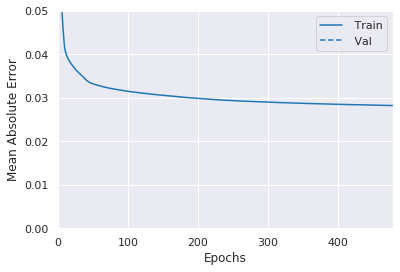

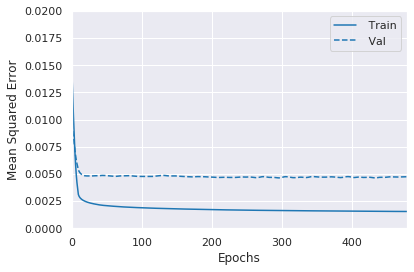

In [34]:
model.show_history()

## Model Validation

9933/1 - 0s - loss: 0.0023 - mae: 0.0301 - mse: 0.0018
Validation loss: 0.003164313445686259
Mean absolute error: 0.030090379
Mean squared error: 0.0017988081
Average distance error: 1.200772078737699


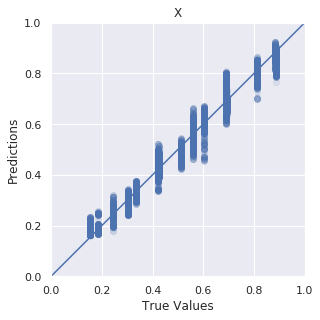

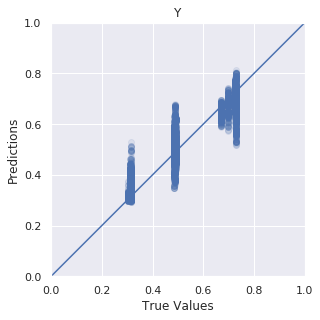

In [35]:
model.model_validation(X_validation, y_validation, scaled=True)

## Model Testing

8458/1 - 0s - loss: 0.0054 - mae: 0.0524 - mse: 0.0047
Test loss: 0.006067784894548478
Mean absolute error: 0.052364286
Mean squared error: 0.0047022793
Average distance error: 1.9936437449897042


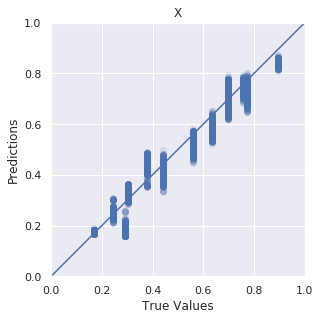

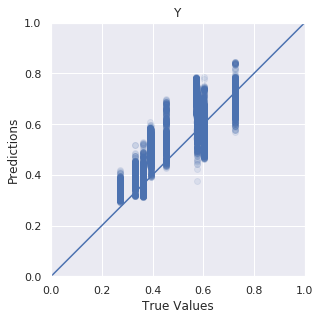

In [36]:
model.model_testing(X_test, y_test, scaled=True)

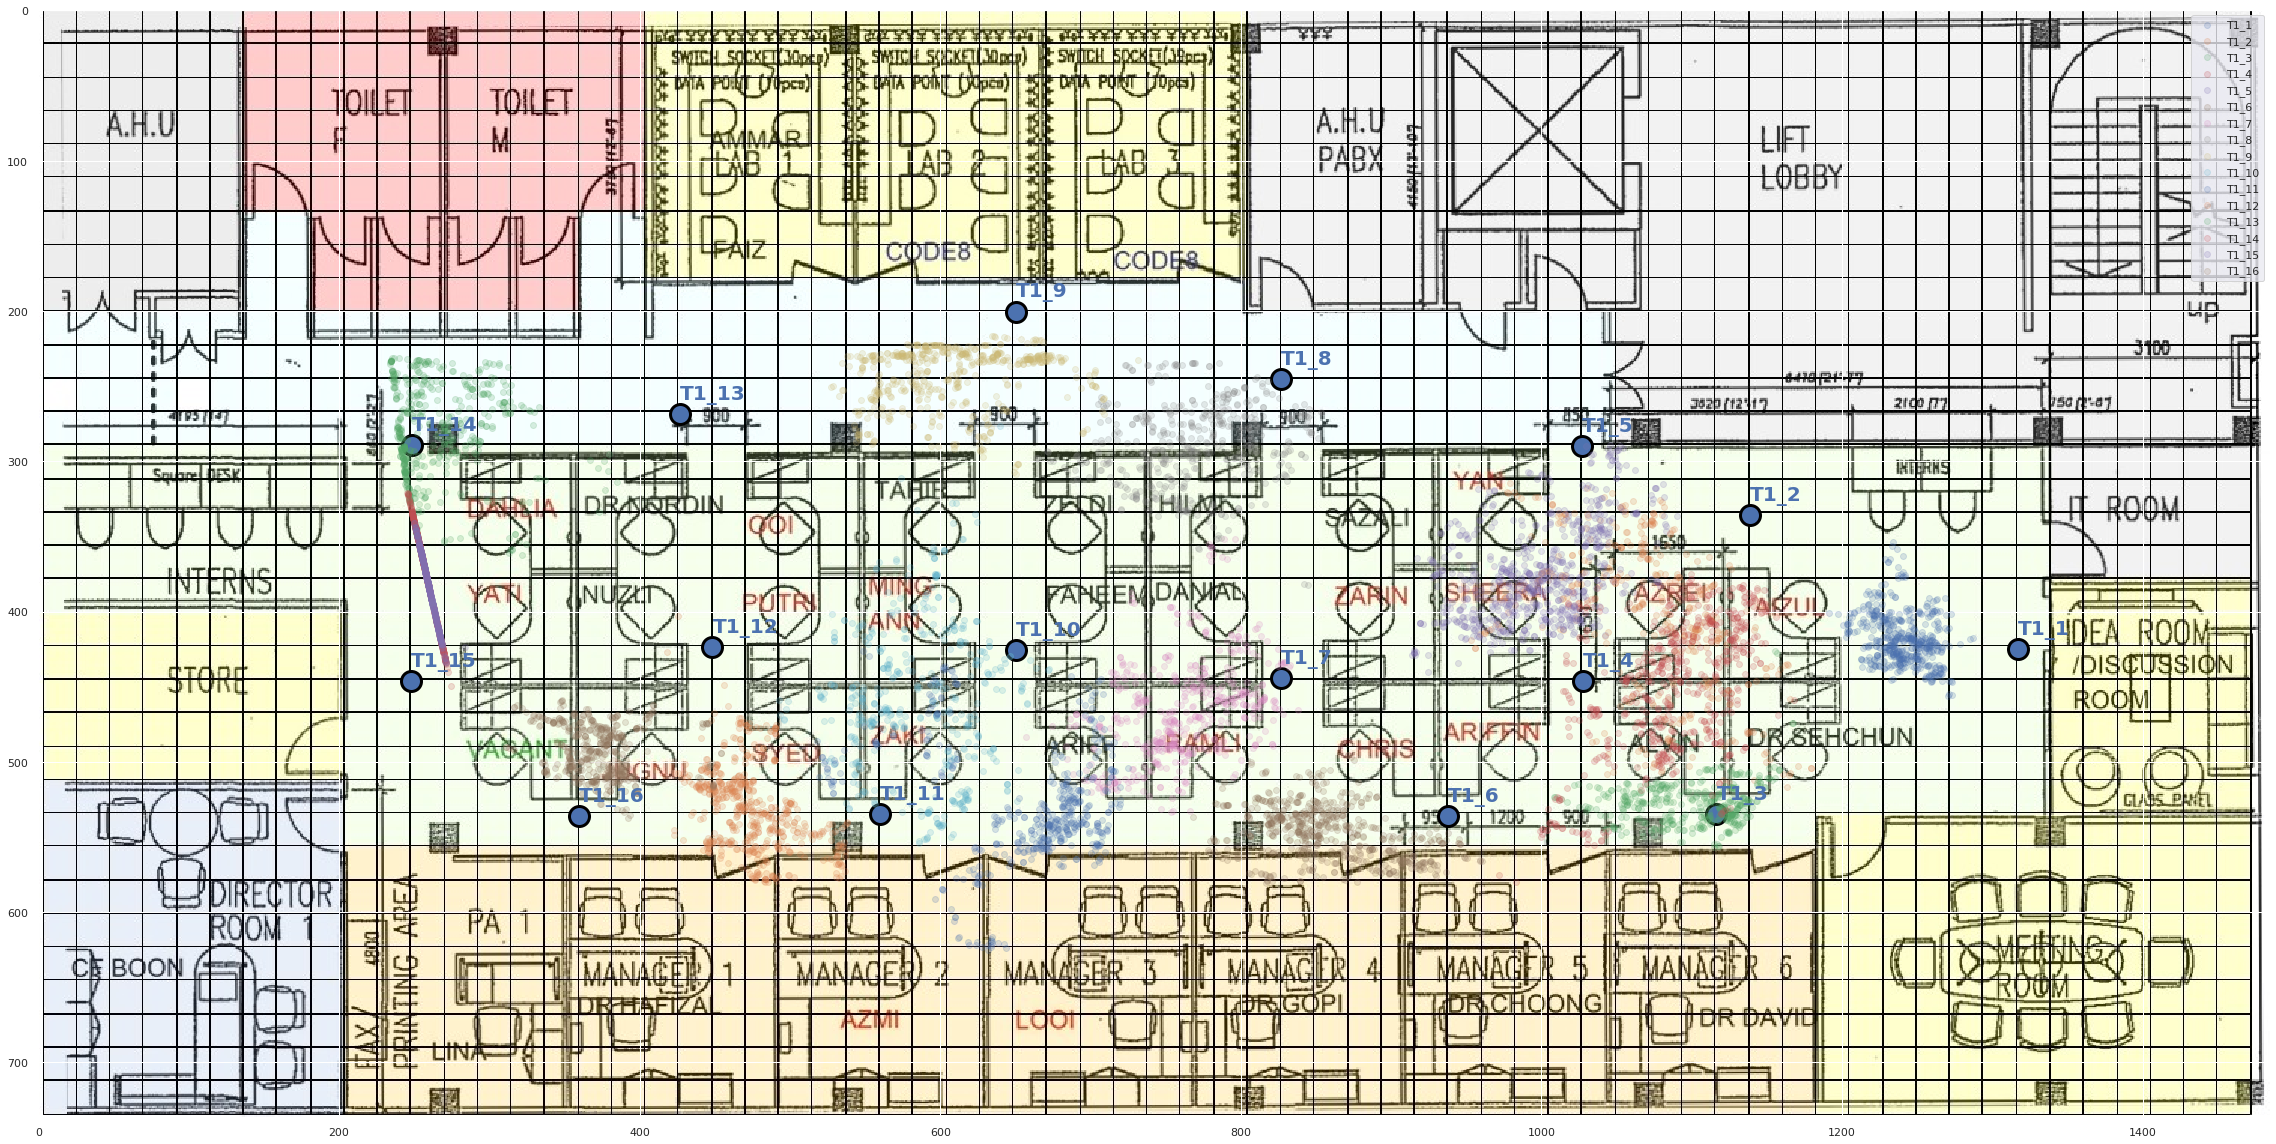

In [37]:
img =  mpimg.imread('../Map/main.png')
fingerprint_color = "r"
testdata_color = "b"
plt.figure(figsize=(40,40))
plt.imshow(img)

labels = ["V1_23", "V1_24", "V1_32", "V1_22", "V1_14", "V1_13", "V1_12", "V1_21", "V1_29", "V1_30", "V1_31", "V1_11", "V1_20", "V1_28", "V1_10", "V1_19", "V1_27", "V1_9", "V1_8", "V1_18", "V1_26"]
x = [27.151600, 29.594400, 29.689400, 23.153700, 23.169100, 20.171700, 17.173201, 18.712299, 18.691700, 23.244200, 27.133301, 14.063600, 14.159800, 14.250300, 11.176600, 10.162500, 10.141900, 8.178670, 5.180690, 6.164600, 6.255650]
y = [8.159480, 8.172020, 11.286000, 8.250140, 5.247920, 5.121330, 5.217130, 8.227330, 12.230300, 12.253700, 11.717700, 5.312350, 8.203950, 12.207500, 5.297530, 8.183420, 12.186400, 5.282130, 5.266730, 8.274090, 12.166400]
x = np.array(x) * 44
y = np.array(y) * 44

testLabels = ["T1_1", "T1_2", "T1_3", "T1_4", "T1_5", "T1_6", "T1_7", "T1_8", "T1_9", "T1_10", "T1_11", "T1_12", "T1_13", "T1_14", "T1_15", "T1_16"]
testX = [29.934250, 25.877805, 25.372470, 23.355726, 23.333564, 21.316819, 18.790348, 18.790348, 14.779021, 14.779021, 12.717952, 10.191480, 9.703916, 5.648265, 5.626103, 8.174736]
testY = [9.659024, 7.630801, 12.155781, 10.139037, 6.593112, 12.177943, 10.094712, 5.573659, 4.554205, 9.673634, 12.155781, 9.629310, 6.105547, 6.570950, 10.139037, 12.177943]
testX = np.array(testX) * 44
testY = np.array(testY) * 44

# plt.scatter(x, y, s=400, c=fingerprint_color, edgecolors="black", linewidths=3)
plt.scatter(testX, testY, s=400, c=testdata_color, edgecolors="black", linewidths=3)

# for i in range(len(labels)):
#     plt.annotate(labels[i], (x[i], y[i] - 10), fontsize=20, color=fingerprint_color, weight='bold')

for j in range(len(testLabels)):
    plt.annotate(testLabels[j], (testX[j], testY[j] - 10), fontsize=20, color=testdata_color, weight='bold')

for i in range(len(testLabels)):
    loc = testLabels[i]
    test_loc = test_imputed[test_imputed['location'] == loc]
    X_loc = test_loc[scanners].values
    locs = model.predict(X_loc) * 44
    inv_scale(locs)
    plt.scatter(locs[:, 0], locs[:, 1], alpha=0.2, label=testLabels[i])
plt.legend()

In [38]:
model.model.save_weights('../Models/MLP_Regression_Rolling_FFill_MinMax_ExtraTest_LinearDistanceModel.h5')